# Modèle 7 : Proies VS prédateurs

## Le programme

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pylab as p

def dX_dt(X,t=0):

    a = 0.1
    b = 0.3
    c = 0.3 
    d = 0.01

    x = X[0]
    y = X[1]

    return np.array([x * (a - b * y) , - y * (c - d * x)])

## Application

In [6]:
x0 = 10   # population de lapins initiale
y0 = 100  # population de renards initiale

# Résolution de l'équation différentielle
X0 = [x0, y0]
t = np.linspace(0,20)
X = integrate.odeint(dX_dt,X0,t)
x,y = X.T

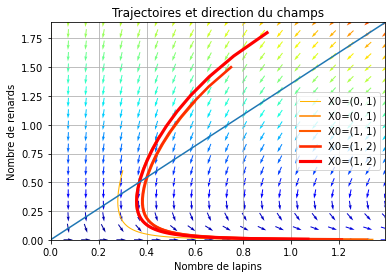

In [7]:
p.figure()
p.title('Trajectoires et direction du champs')

X_f0 = np.array([0,0])
X_f1 = np.array([1,2])

values  = np.linspace(0.3, 0.9, 5)                          # position de X0 entre X_f0 et X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # couleurs des trajectoires

for v, col in zip(values, vcolors):
    X0 = v * X_f1  
    X = integrate.odeint( dX_dt, X0, t)     
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    
ymax = p.ylim(ymin=0)[1] 
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

# Création d'une grille
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1 , Y1  = np.meshgrid(x, y)  

# Calcul de la direction en chaque point de la grille
DX1, DY1 = dX_dt([X1, Y1])  # Taux de croissance en chaque point 
M = (np.hypot(DX1, DY1))    # Taux de croissance normalisé
M[ M == 0] = 1.             # pour éviter la division par 0
DX1 /= M ; DY1 /= M         # Vecteurs normalisés

p.plot(x,y)
p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Nombre de lapins')
p.ylabel('Nombre de renards')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
p.show()